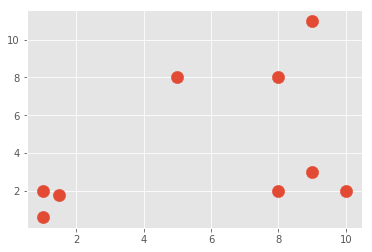

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [12]:
def _dist(p,q):
    return math.sqrt(np.power(p-q,2).sum())

def _eps_neighborhood(p,q,eps):
    return _dist(p,q) < eps

def _region_query(m, point_id, eps):
    n_points = m.shape[0]
    seeds = []
    for i in range(0, n_points):
        if _eps_neighborhood(m[point_id,:], m[i,:], eps):
            seeds.append(i)
    return seeds

In [13]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    seeds = _region_query(m, point_id, eps)
    if len(seeds) < min_points:
        classifications[point_id] = NOISE
        return False
    else:
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            classifications[seed_id] = cluster_id
            
        while len(seeds) > 0:
            current_point = seeds[0]
            results = _region_query(m, current_point, eps)
            if len(results) >= min_points:
                for i in range(0, len(results)):
                    result_point = results[i]
                    if classifications[result_point] == UNCLASSIFIED or classifications[result_point] == NOISE:
                        if classifications[result_point] == UNCLASSIFIED:
                            seeds.append(result_point)
                        classifications[result_point] = cluster_id
            seeds = seeds[1:]
        return True

In [14]:
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[0]
    classifications = [UNCLASSIFIED] * n_points
    for point_id in range(0, n_points):
        if classifications[point_id] == UNCLASSIFIED:
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id = cluster_id + 1
    return classifications

In [57]:
eps = 5.0
min_points = 3
UNCLASSIFIED = False
NOISE = None

In [60]:
labels=dbscan(X, eps, min_points)
labels

[1, 1, 2, 2, 1, 2, 3, 3, 3]

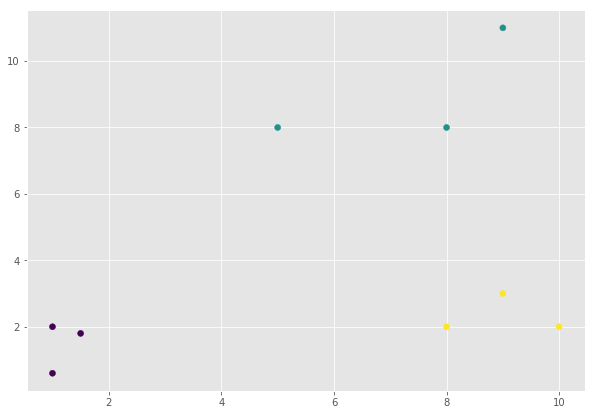

In [61]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0],X[:,1], c=labels) 